In [1]:
import numpy as np
import pandas as pd
from scipy.stats import levene,chi2_contingency



In [2]:
!gdown 1JlLaJLkqAcfUFJvI1OACmuorXxL4gRzm

Downloading...
From: https://drive.google.com/uc?id=1JlLaJLkqAcfUFJvI1OACmuorXxL4gRzm
To: /content/bike_sharing.CSV
100% 648k/648k [00:00<00:00, 7.88MB/s]


In [13]:
# @title
df=pd.read_csv('bike_sharing.CSV')
df3=pd.read_csv('bike_sharing.CSV')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df3.drop(['datetime'],axis=1,inplace=True)
df2

KeyError: "['datetime'] not found in axis"

In [15]:
df3.kurt()

season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
atemp         -0.850076
humidity      -0.759818
windspeed      0.630133
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64

In [ ]:
df.describe(include = 'all')



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
#Checking the unique value in every column of the dataset.
for i in df.columns:
 print('Unique value in ', i , 'columns are :')
 print(df[i].unique())
 print("-"* 75)

Unique value in  datetime columns are :
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
---------------------------------------------------------------------------
Unique value in  season columns are :
[1 2 3 4]
---------------------------------------------------------------------------
Unique value in  holiday columns are :
[0 1]
---------------------------------------------------------------------------
Unique value in  workingday columns are :
[0 1]
---------------------------------------------------------------------------
Unique value in  weather columns are :
[1 2 3 4]
---------------------------------------------------------------------------
Unique value in  temp columns are :
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.

In [ ]:
# Datatype of the columns in customers table:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#Number of rows and columns
df.shape

(10886, 12)

In [ ]:
#Missing values
df.isna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Ensuring ns missing values are found  using the sum-total fn()
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#No redundant data
df.duplicated().sum()

0

In [ ]:
#selecting numeric fields from one dataframe to another.
num_var=df.select_dtypes(include=['number'])
num_var

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
#Dataset is showing datetime asthe  only one categorical varaible
cat_var=df.select_dtypes(include=['object'])

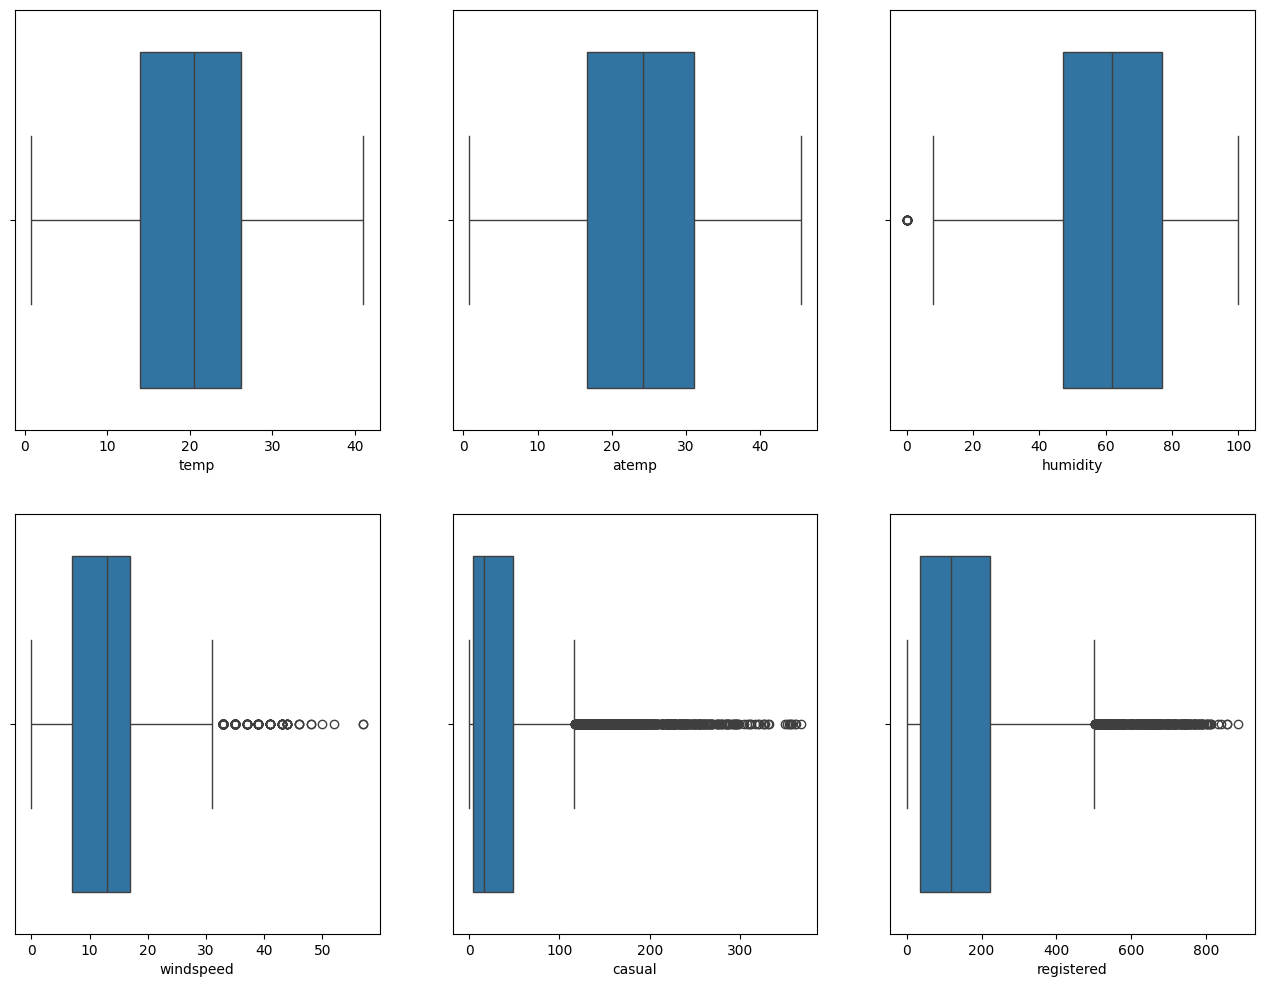

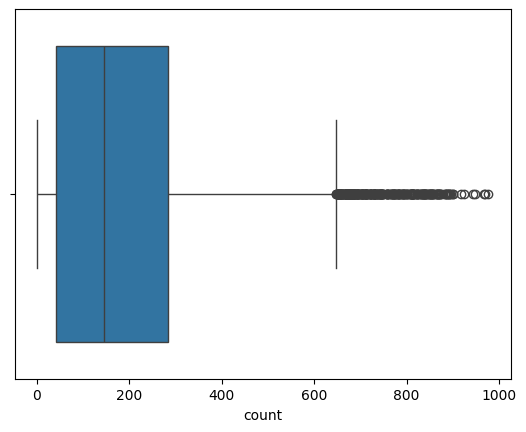

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns
# Continuous variables in the dataset
continuous_vars = [ 'temp'	,'atemp',	'humidity'	,'windspeed'	,'casual',	'registered',	'count']
plt.figure(figsize=(18, 8))
for i, var in enumerate(continuous_vars, start=1):
  plt.subplot(3,4 , i)
  sns.boxplot(data=df, y=var, color='yellow')
  plt.title(f'Boxplot of {var}')
  plt.ylabel(var)
  plt.xlabel('')
plt.tight_layout()
plt.show()
'''
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
    index += 1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

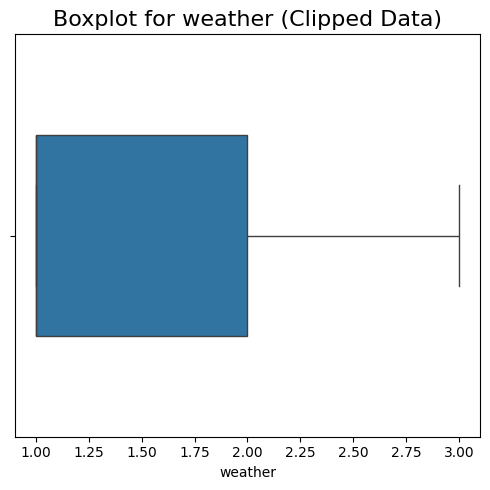

In [ ]:
# Clipping the outliers using np.clip()
w1=np.percentile(df['weather'],5)
w2=np.percentile(df['weather'],95)
#df['clipped']=np.clip(df['Occupation'],o1,o2,inplace=True)
clipped_data = np.clip(df['weather'], w1, w2)
plt.figure(figsize=(5, 5))
# Create a box plot for clipped data
sns.boxplot(x=clipped_data, width=0.5, orient='h')
plt.title('Boxplot for weather (Clipped Data)', fontsize=16)
plt.tight_layout()
plt.show()

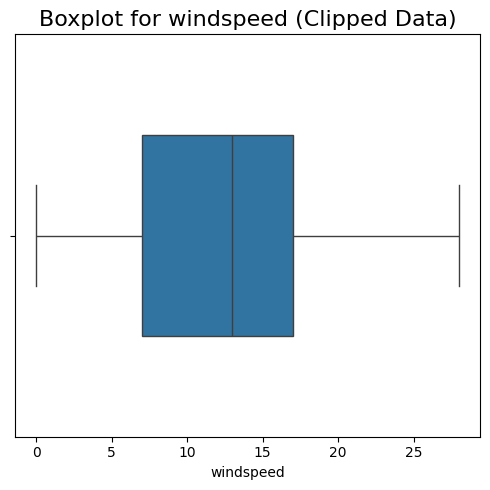

In [ ]:
# Clipping the outliers using np.clip()
w1=np.percentile(df['windspeed'],5)
w2=np.percentile(df['windspeed'],95)
clipped_data = np.clip(df['windspeed'], w1, w2)
plt.figure(figsize=(5, 5))
# Create a box plot for clipped data
sns.boxplot(x=clipped_data, width=0.5, orient='h')
plt.title('Boxplot for windspeed (Clipped Data)', fontsize=16)
plt.tight_layout()
plt.show()

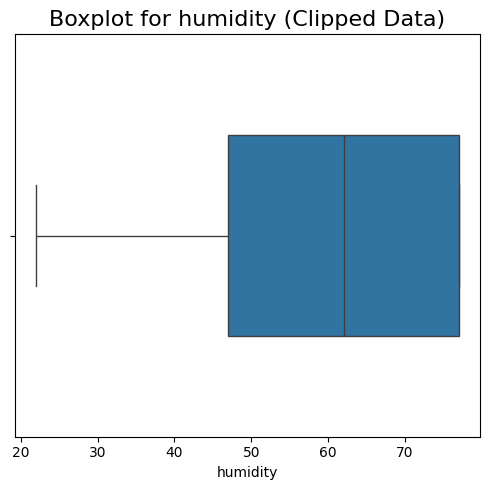

In [ ]:
# Clipping the outliers using np.clip()
w1=np.percentile(df['humidity'],1)
w2=np.percentile(df['humidity'],75)
#df['clipped']=np.clip(df['Occupation'],o1,o2,inplace=True)
clipped_data = np.clip(df['humidity'], w1, w2)
plt.figure(figsize=(5, 5))
# Create a box plot for clipped data
sns.boxplot(x=clipped_data, width=0.5, orient='h')
plt.title('Boxplot for humidity (Clipped Data)', fontsize=16)
plt.tight_layout()
plt.show()

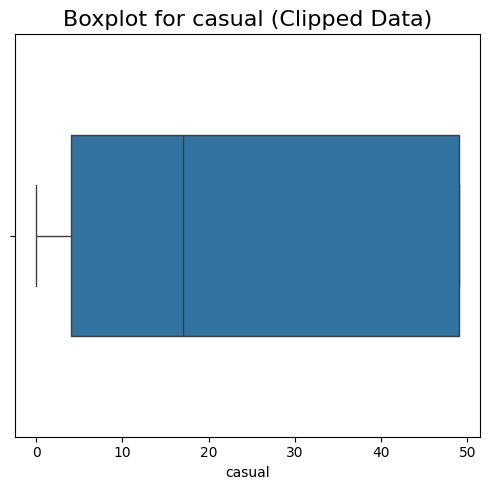

In [ ]:
# Clipping the outliers using np.clip()
w1=np.percentile(df['casual'],5)
w2=np.percentile(df['casual'],75)
clipped_data = np.clip(df['casual'], w1, w2)
plt.figure(figsize=(5, 5))
# Create a box plot for clipped data
sns.boxplot(x=clipped_data, width=0.5, orient='h')
plt.title('Boxplot for casual (Clipped Data)', fontsize=16)
plt.tight_layout()
plt.show()

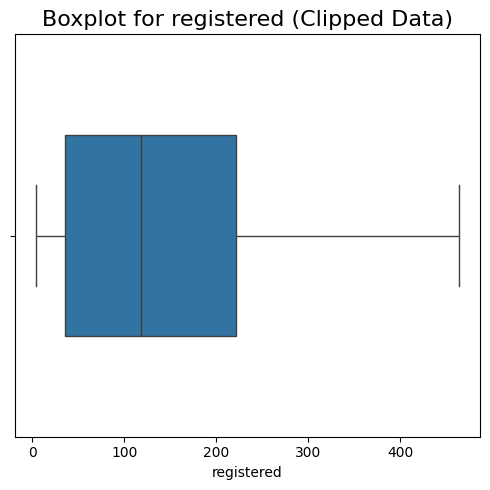

In [ ]:
# Clipping the outliers using np.clip()
w1=np.percentile(df['registered'],5)
w2=np.percentile(df['registered'],95)
clipped_data = np.clip(df['registered'], w1, w2)
plt.figure(figsize=(5, 5))
# Create a box plot for clipped data
sns.boxplot(x=clipped_data, width=0.5, orient='h')
plt.title('Boxplot for registered (Clipped Data)', fontsize=16)
plt.tight_layout()
plt.show()

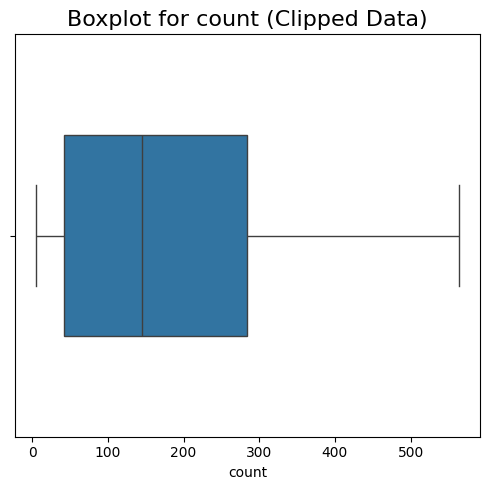

In [ ]:
# Clipping the outliers using np.clip()
w1=np.percentile(df['count'],5)
w2=np.percentile(df['count'],95)
clipped_data = np.clip(df['count'], w1, w2)
plt.figure(figsize=(5, 5))
# Create a box plot for clipped data
sns.boxplot(x=clipped_data, width=0.5, orient='h')
plt.title('Boxplot for count (Clipped Data)', fontsize=16)
plt.tight_layout()
plt.show()

<Axes: xlabel='temp', ylabel='Count'>

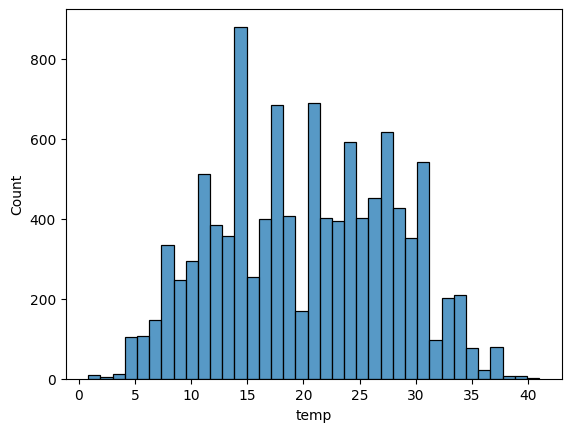

In [ ]:
sns.histplot(df["temp"])

<Axes: xlabel='atemp', ylabel='Count'>

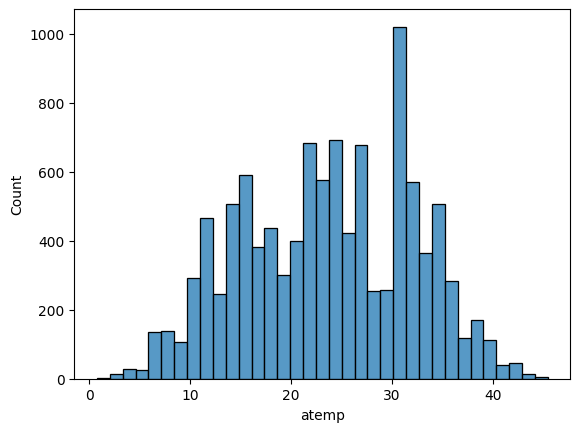

In [ ]:
sns.histplot(df["atemp"])

<Axes: xlabel='humidity', ylabel='Count'>

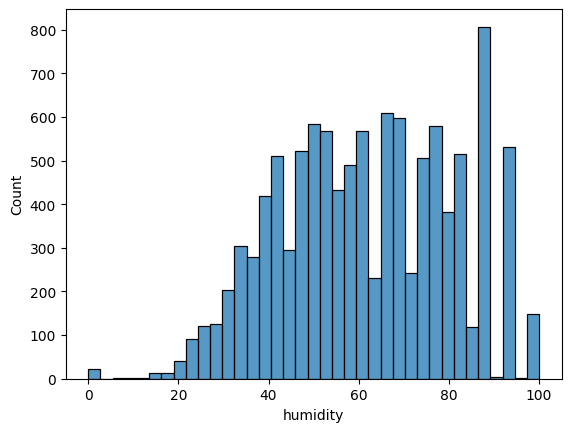

In [ ]:
sns.histplot(df["humidity"])

<Axes: xlabel='windspeed', ylabel='Count'>

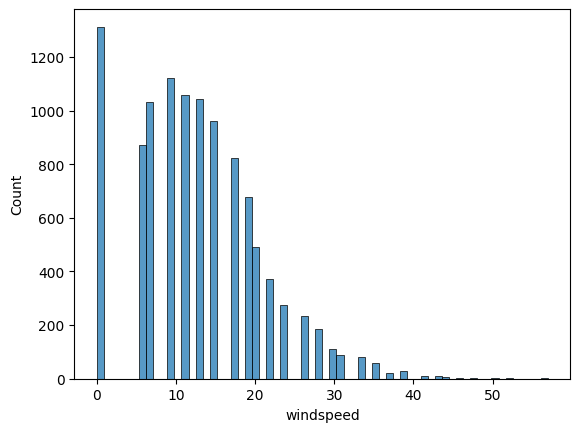

In [ ]:
sns.histplot(df["windspeed"])

<Axes: xlabel='season', ylabel='Count'>

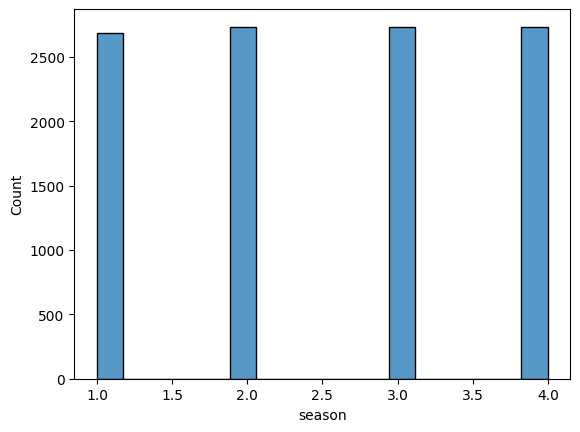

In [ ]:
sns.histplot(df["season"])

<Axes: xlabel='holiday', ylabel='Count'>

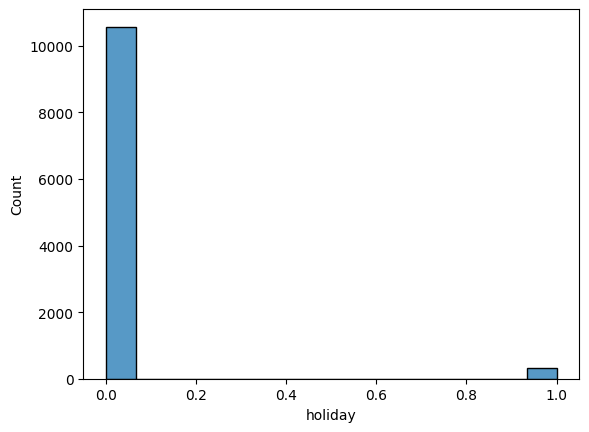

In [ ]:
sns.histplot(df["holiday"])

<Axes: xlabel='workingday', ylabel='Count'>

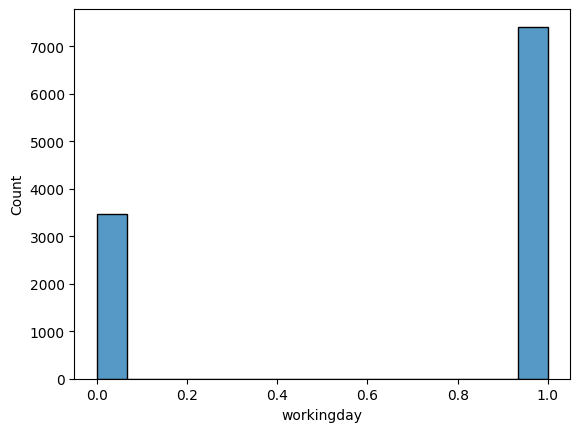

In [ ]:
sns.histplot(df["workingday"])

<Axes: xlabel='casual', ylabel='Count'>

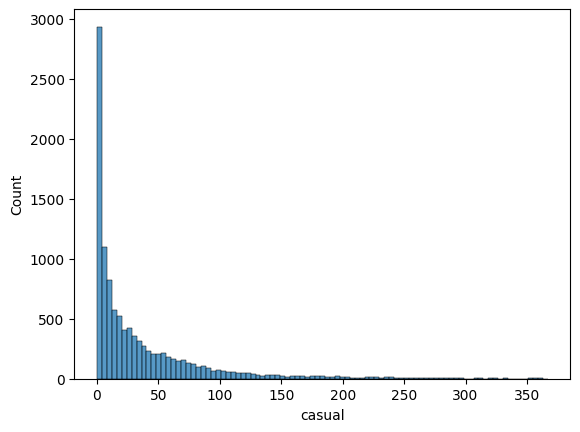

In [ ]:
sns.histplot(df['casual'])

<Axes: xlabel='registered', ylabel='Count'>

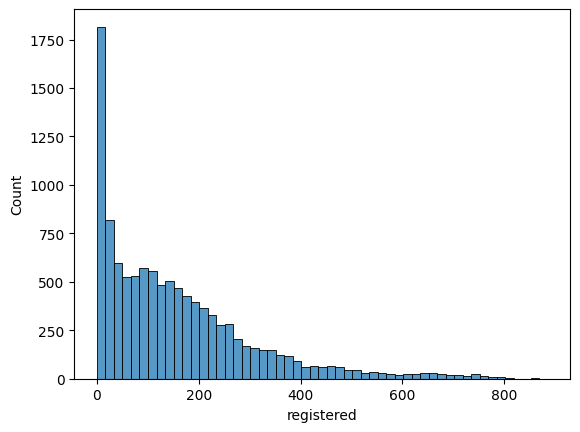

In [ ]:
sns.histplot(df['registered'])

<Axes: xlabel='count', ylabel='Count'>

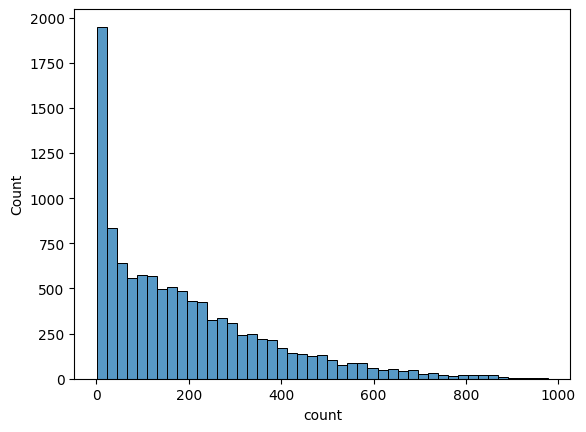

In [ ]:
sns.histplot(df['count'])

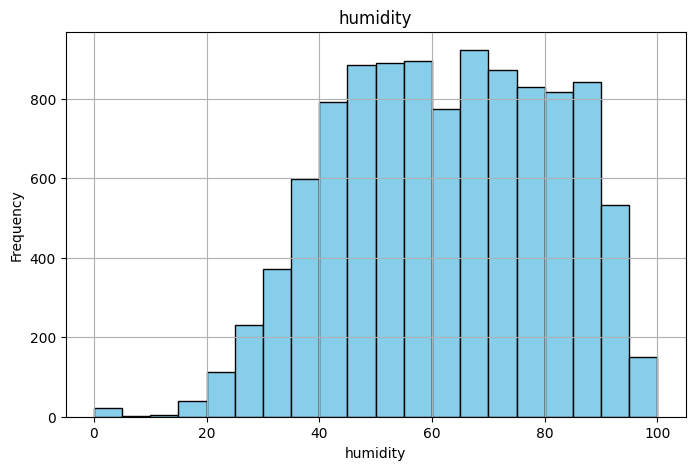

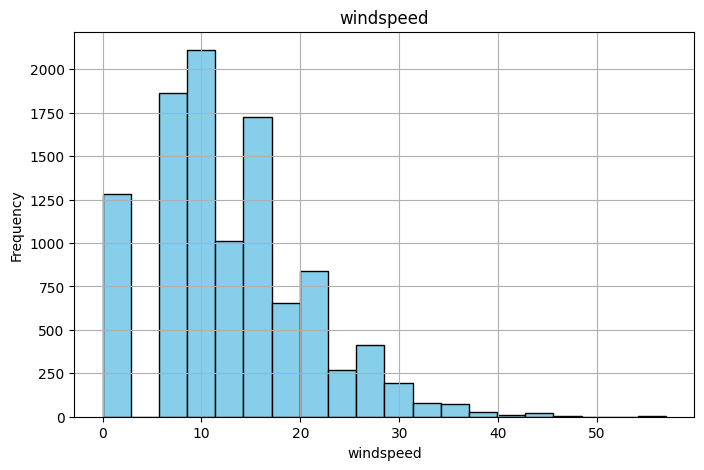

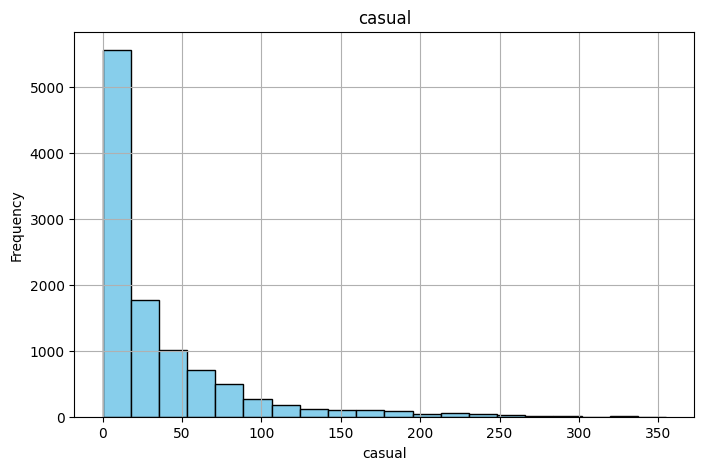

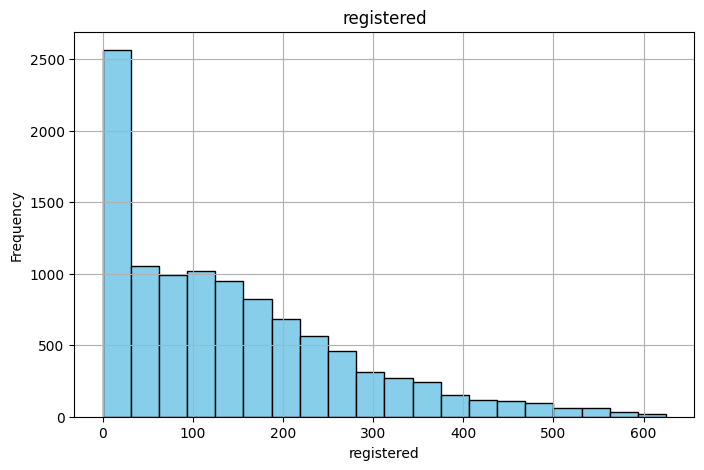

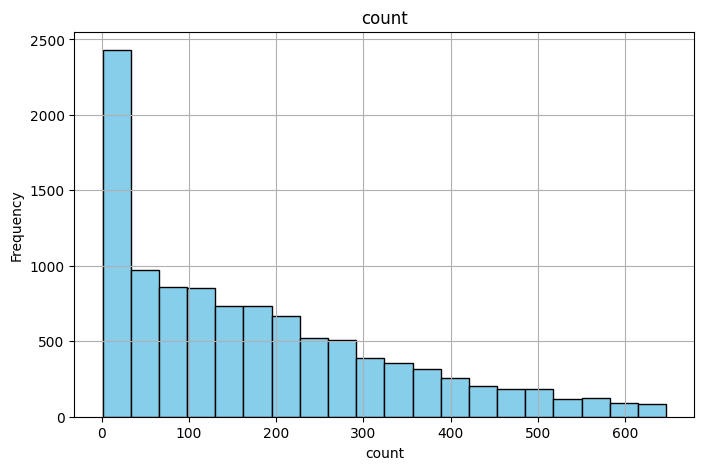

In [ ]:
#Removal of outliers using IQR
numerical_columns = [ 'humidity', 'windspeed', 'casual', 'registered', 'count']

# User defined function to remove outliers using IQR  and plotting thereafter.
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers from each numerical column
for col in numerical_columns:
    data = remove_outliers(df, col)

# Plot cleaned data
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
#Outlier removal using IQR
df1=pd.read_csv('bike_sharing.CSV')
windspeed_array = df1['windspeed'].to_numpy()
Q1 = np.percentile(windspeed_array, 25)
Q3 = np.percentile(windspeed_array, 75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [value for value in windspeed_array if value < lower_bound or value > upper_bound]

# Print the results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Identified Outliers:", outliers)

Lower Bound: -7.993100000000002
Upper Bound: 31.992500000000003
Identified Outliers: [32.9975, 36.9974, 35.0008, 35.0008, 39.0007, 35.0008, 35.0008, 36.9974, 32.9975, 36.9974, 35.0008, 32.9975, 32.9975, 36.9974, 32.9975, 35.0008, 39.0007, 35.0008, 32.9975, 43.9989, 40.9973, 40.9973, 32.9975, 35.0008, 43.9989, 32.9975, 51.9987, 46.0022, 35.0008, 39.0007, 32.9975, 32.9975, 35.0008, 39.0007, 43.9989, 39.0007, 39.0007, 32.9975, 40.9973, 43.9989, 50.0021, 43.0006, 40.9973, 35.0008, 36.9974, 32.9975, 32.9975, 35.0008, 36.9974, 35.0008, 32.9975, 32.9975, 40.9973, 39.0007, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 36.9974, 35.0008, 40.9973, 32.9975, 36.9974, 32.9975, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 35.0008, 35.0008, 35.0008, 35.0008, 32.9975, 35.0008, 32.9975, 39.0007, 35.0008, 39.0007, 39.0007, 39.0007, 35.0008, 32.9975, 40.9973, 35.0008, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 56.9969, 56.9969, 32.9975, 32.9975, 43.0006, 32.99

In [ ]:
df1=pd.read_csv('bike_sharing.CSV')
casual_array = df1['windspeed'].to_numpy()
Q1 = np.percentile(casual_array, 25)
Q3 = np.percentile(casual_array, 75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [value for value in windspeed_array if value < lower_bound or value > upper_bound]

# Print the results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Identified Outliers:", outliers)

Lower Bound: -7.993100000000002
Upper Bound: 31.992500000000003
Identified Outliers: [32.9975, 36.9974, 35.0008, 35.0008, 39.0007, 35.0008, 35.0008, 36.9974, 32.9975, 36.9974, 35.0008, 32.9975, 32.9975, 36.9974, 32.9975, 35.0008, 39.0007, 35.0008, 32.9975, 43.9989, 40.9973, 40.9973, 32.9975, 35.0008, 43.9989, 32.9975, 51.9987, 46.0022, 35.0008, 39.0007, 32.9975, 32.9975, 35.0008, 39.0007, 43.9989, 39.0007, 39.0007, 32.9975, 40.9973, 43.9989, 50.0021, 43.0006, 40.9973, 35.0008, 36.9974, 32.9975, 32.9975, 35.0008, 36.9974, 35.0008, 32.9975, 32.9975, 40.9973, 39.0007, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 36.9974, 35.0008, 40.9973, 32.9975, 36.9974, 32.9975, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 35.0008, 35.0008, 35.0008, 35.0008, 32.9975, 35.0008, 32.9975, 39.0007, 35.0008, 39.0007, 39.0007, 39.0007, 35.0008, 32.9975, 40.9973, 35.0008, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 56.9969, 56.9969, 32.9975, 32.9975, 43.0006, 32.99

In [ ]:
df1=pd.read_csv('bike_sharing.CSV')
reg_array = df1['windspeed'].to_numpy()
Q1 = np.percentile(reg_array, 25)
Q3 = np.percentile(reg_array, 75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [value for value in reg_array if value < lower_bound or value > upper_bound]

# Print the results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Identified Outliers:", outliers)

Lower Bound: -7.993100000000002
Upper Bound: 31.992500000000003
Identified Outliers: [32.9975, 36.9974, 35.0008, 35.0008, 39.0007, 35.0008, 35.0008, 36.9974, 32.9975, 36.9974, 35.0008, 32.9975, 32.9975, 36.9974, 32.9975, 35.0008, 39.0007, 35.0008, 32.9975, 43.9989, 40.9973, 40.9973, 32.9975, 35.0008, 43.9989, 32.9975, 51.9987, 46.0022, 35.0008, 39.0007, 32.9975, 32.9975, 35.0008, 39.0007, 43.9989, 39.0007, 39.0007, 32.9975, 40.9973, 43.9989, 50.0021, 43.0006, 40.9973, 35.0008, 36.9974, 32.9975, 32.9975, 35.0008, 36.9974, 35.0008, 32.9975, 32.9975, 40.9973, 39.0007, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 36.9974, 35.0008, 40.9973, 32.9975, 36.9974, 32.9975, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 35.0008, 35.0008, 35.0008, 35.0008, 32.9975, 35.0008, 32.9975, 39.0007, 35.0008, 39.0007, 39.0007, 39.0007, 35.0008, 32.9975, 40.9973, 35.0008, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 56.9969, 56.9969, 32.9975, 32.9975, 43.0006, 32.99

In [ ]:
df1=pd.read_csv('bike_sharing.CSV')
cnt_array = df1['windspeed'].to_numpy()
Q1 = np.percentile(cnt_array, 25)
Q3 = np.percentile(cnt_array, 75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [value for value in cnt_array if value < lower_bound or value > upper_bound]

# Print the results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Identified Outliers:", outliers)

Lower Bound: -7.993100000000002
Upper Bound: 31.992500000000003
Identified Outliers: [32.9975, 36.9974, 35.0008, 35.0008, 39.0007, 35.0008, 35.0008, 36.9974, 32.9975, 36.9974, 35.0008, 32.9975, 32.9975, 36.9974, 32.9975, 35.0008, 39.0007, 35.0008, 32.9975, 43.9989, 40.9973, 40.9973, 32.9975, 35.0008, 43.9989, 32.9975, 51.9987, 46.0022, 35.0008, 39.0007, 32.9975, 32.9975, 35.0008, 39.0007, 43.9989, 39.0007, 39.0007, 32.9975, 40.9973, 43.9989, 50.0021, 43.0006, 40.9973, 35.0008, 36.9974, 32.9975, 32.9975, 35.0008, 36.9974, 35.0008, 32.9975, 32.9975, 40.9973, 39.0007, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 36.9974, 35.0008, 40.9973, 32.9975, 36.9974, 32.9975, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 35.0008, 35.0008, 35.0008, 35.0008, 32.9975, 35.0008, 32.9975, 39.0007, 35.0008, 39.0007, 39.0007, 39.0007, 35.0008, 32.9975, 40.9973, 35.0008, 35.0008, 39.0007, 32.9975, 32.9975, 32.9975, 35.0008, 32.9975, 56.9969, 56.9969, 32.9975, 32.9975, 43.0006, 32.99

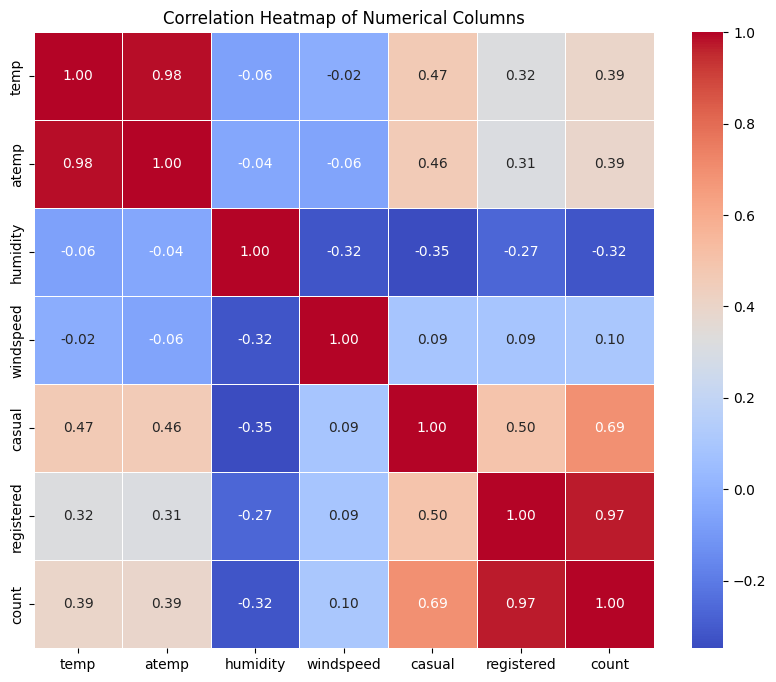

In [ ]:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

Cells that are either very dark indicates a negative correlation or very light indicates a positive correlation. Otherwise these indicate strong correlations between the corresponding variables.
The diagonal elements of the heatmap is 1, which indicates the heat map has plotted correlation appropriately.
Room temperature and feel_free temperature (atemp) seems to co-exist.Also the number of registered users and the total count of bikes used are strongly correlated, which indicates almost all the reg. users are benefitting from their registration. Otherwise the ratio between the casual goers and the reg.users teams up to be equal to the total number of vehicles on the road.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='holiday', ylabel='count'>

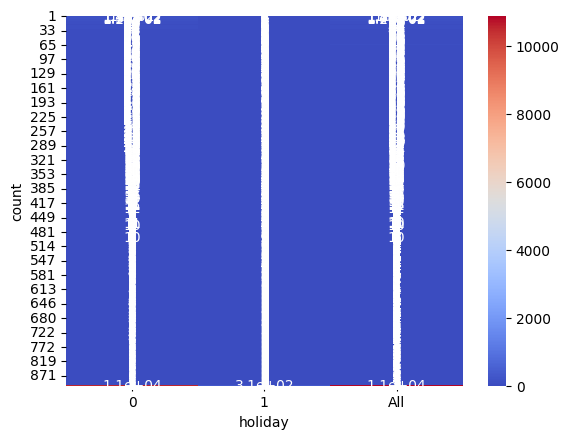

In [ ]:
#Column and row total
w_margins = pd.crosstab(df['count'],df['holiday'], margins=True)
sns.heatmap(w_margins, cmap='coolwarm' , annot=True)

In [ ]:
#Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?
#H0:There is no significant difference between the no. of bike rides on Weekdays and Weekends
#H1:There is no significant difference between the no. of bike rides on Weekdays and Weekends
from scipy.stats import ttest_ind
df.groupby('workingday')['count'].mean()
sd=df['count'].std()
sd
df.groupby('workingday').count()


,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count
workingday,,,,,,,,,,,
0,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474
1,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412


This means that the null hypothesis (that there is no difference between the means of the two groups) is true.
Sample mean of the first group is 188.507
Sample mean of the second group is 183.011
Pooled standard deviation is 181.144
Sample size of the first group is 3474
Sample size of the second group is 7412
Test Statistic=1.475.
p_value=0.139
Since the p-value (0.139) is greater than the significance level (0.05), we fail to reject the null hypothesis.This suggests that there is not enough evidence to conclude that there is a significant difference between the means of the two groups at the 5% significance level.

In [ ]:
from scipy.stats import ttest_ind
m1=df.groupby('workingday')['count'].mean()
sd1=df.groupby('workingday')['count'].std()
n1=df.groupby('workingday')['count'].count()
from scipy.stats import ttest_ind
m2=df.groupby('holiday')['count'].mean()
sd2=df.groupby('holiday')['count'].std()
n2=df.groupby('holiday')['count'].count()
m1,m2,sd1,sd2,n1,n2

(workingday
 0    188.506621
 1    193.011873
 Name: count, dtype: float64,
 holiday
 0    191.741655
 1    185.877814
 Name: count, dtype: float64,
 workingday
 0    173.724015
 1    184.513659
 Name: count, dtype: float64,
 holiday
 0    181.513131
 1    168.300531
 Name: count, dtype: float64,
 workingday
 0    3474
 1    7412
 Name: count, dtype: int64,
 holiday
 0    10575
 1      311
 Name: count, dtype: int64)

This means that the null hypothesis (that there is no difference between the means of the two groups) is true. Sample mean of the first group is 188.507 Sample mean of the second group is 183.011 Pooled standard deviation is 181.144 Sample size of the first group is 3474 Sample size of the second group is 7412 Test Statistic=1.475. p_value=0.139 Since the p-value (0.139) is greater than the significance level (0.05), we fail to reject the null hypothesis.This suggests that there is not enough evidence to conclude that there is a significant difference between the means of the two groups at the 5% significance level.

In [ ]:
#Check if there any significant difference between the no. of bike rides on Working days and holidays?
#H0:There is no significant difference between the no. of bike rides on working days amd holidays.
#H1:There is significant difference between the no. of bike rides on working days amd holidays.
from scipy.stats import norm
def Sam2Test(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, n1, n2):
    denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
    z_score = (samp_mean_1 - samp_mean_2) / denominator
    return z_score
# Statistics of working day
sample_mean_A = 193.01
sample_std_A = 184.51
sample_size_A = 7412

# Statistics of holiday
sample_mean_B = 185.87
sample_std_B = 168.3
sample_size_B =311

significance_level = 0.05

z_score = Sam2Test(sample_mean_A, sample_mean_B, sample_std_A, sample_std_B, sample_size_A, sample_size_B)

# Calculate the one-tailed p-value
p_value = 1-norm.cdf(z_score)

# Compare the p-value to the significance level
if p_value < significance_level:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"
# Print the results
print(f'z-score: {z_score:.4f}')
print(f'p-value: {p_value:.4f}')
print('Conclusion:', conclusion)

z-score: 0.7300
p-value: 0.2327
Conclusion: Fail to reject the null hypothesis


Crowd does not care about whether it is a working day or a  holiday while using the bike facility.

In [ ]:
m1=df.groupby('datetime')['count'].nunique()
m1

datetime
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
2011-01-01 04:00:00    1
                      ..
2012-12-19 19:00:00    1
2012-12-19 20:00:00    1
2012-12-19 21:00:00    1
2012-12-19 22:00:00    1
2012-12-19 23:00:00    1
Name: count, Length: 10886, dtype: int64

In [ ]:
c=df['datetime'].dt.strftime("%b")

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
#Over the year the number of people using bikes is considerably increased,ie. around cent percentage hike.
import datetime as dt
df['timestamp'] = df['datetime'].apply(lambda x : pd.to_datetime(str(x)))
df['dat'] = df['timestamp'].dt.date
df.groupby('dat')['count'].sum()
df.sort_values(ascending=False)

dat
2012-09-15    8714
2012-05-19    8294
2012-09-09    8227
2012-10-05    8156
2012-06-02    8120
              ... 
2011-04-16     795
2011-12-07     705
2011-01-18     683
2011-03-10     623
2011-03-06     605
Name: count, Length: 456, dtype: int64

In [ ]:
def Sam2Test(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, n1, n2):
    denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
    z_score = (samp_mean_1 - samp_mean_2) / denominator
    return z_score
# Statistics of
sample_mean_A = 2.87
sample_std_A = 1.08
sample_size_A = 150

# Given data for plant B
sample_mean_B = 2.56
sample_std_B = 1.28
sample_size_B = 200

# Set the significance level
significance_level = 0.01

# Calculate the z-score using the function
z_score = TwoSampZTest(sample_mean_A, sample_mean_B, sample_std_A, sample_std_B, sample_size_A, sample_size_B)

# Calculate the one-tailed p-value
p_value = 1-stats.norm.cdf(z_score)

# Compare the p-value to the significance level
if p_value < significance_level:
    conclusion = "Reject the null hypothesis. Hourly wages in plant 'A' are higher than those in plant 'B' at a 1% significance level."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in hourly wages between plant 'A' and 'B' at a 1% significance level."

# Print the results
print(f'z-score: {z_score:.4f}')
print(f'p-value: {p_value:.4f}')
print('Conclusion:', conclusion)

p-value is (0.140).Test Statistic:(0.145).
Based on both manual calculation and using the ttest_ind function, we reach the same conclusion: there is no significant difference between the means of the two groups at the 5% significance level.
Non-parametric tests could provide insights that were not captured by the two-sample t-test.

In [ ]:
df.weather.unique()

array([1, 2, 3, 4])

In [ ]:
from scipy.stats import f_oneway
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']
f_oneway(spring,summer,fall,winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [ ]:
#Shapiro-Wilk’s test
#H0:Data is Gaussian
#H1:Data is not Gaussian
from scipy.stats import shapiro
shapiro(spring)

ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)

In [ ]:
#Shapiro-Wilk’s test
#H0:Data is Gaussian
#H1:Data is not Gaussian
from scipy.stats import shapiro
shapiro(summer)

ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)

In [ ]:
#Shapiro-Wilk’s test
#H0:Data is Gaussian
#H1:Data is not Gaussian
from scipy.stats import shapiro
shapiro(fall)

ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)

In [ ]:
#Shapiro-Wilk’s test
#H0:Data is Gaussian
#H1:Data is not Gaussian
from scipy.stats import shapiro
shapiro(winter)

ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)

<Axes: xlabel='count', ylabel='Count'>

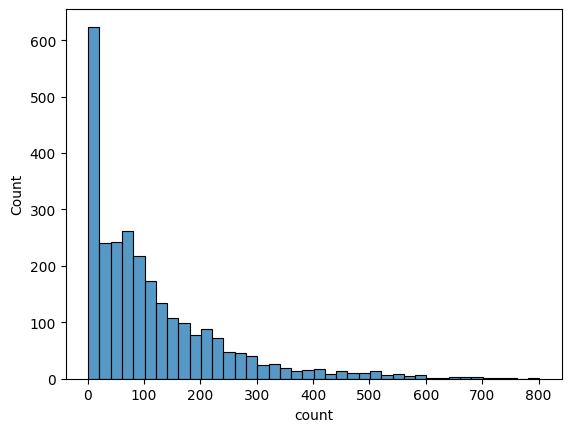

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(spring)

<Axes: xlabel='count', ylabel='Count'>

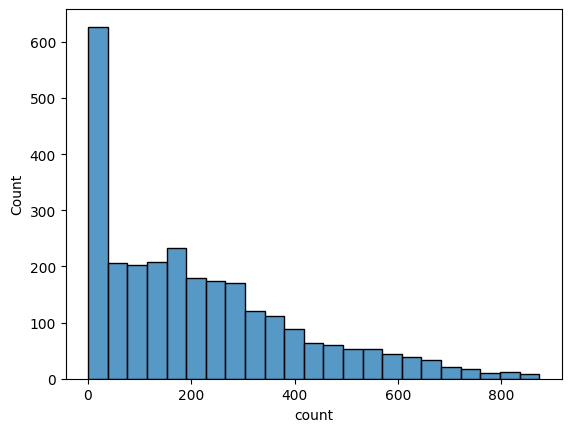

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(summer)

<Axes: xlabel='count', ylabel='Count'>

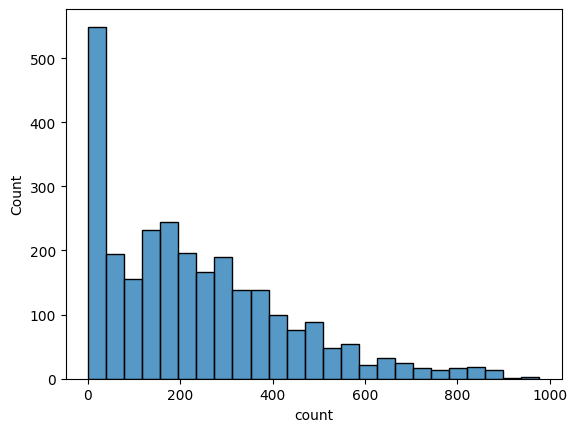

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(fall)

<Axes: xlabel='count', ylabel='Count'>

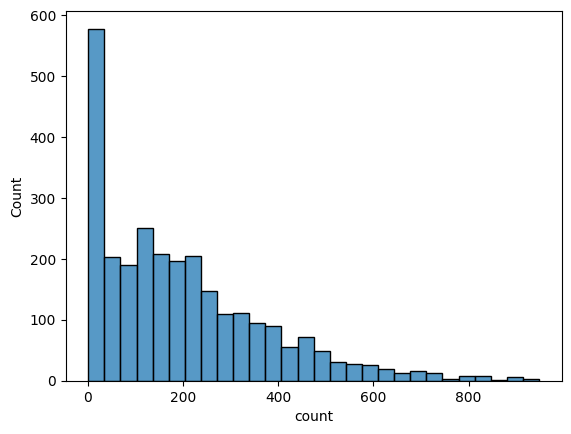

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(winter)

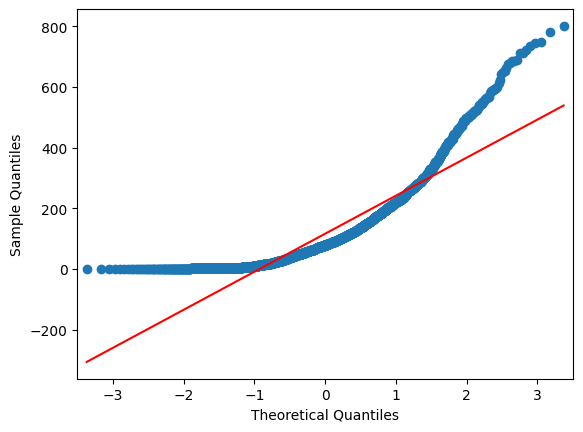

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics .gofplots import qqplot
qqplot(spring,line='s')
plt.show()

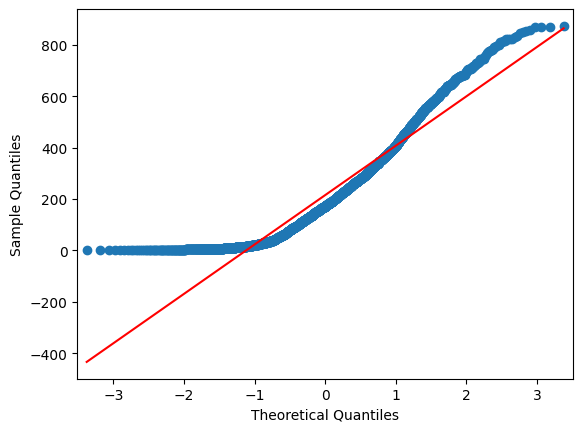

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics .gofplots import qqplot
qqplot(summer,line='s')
plt.show()

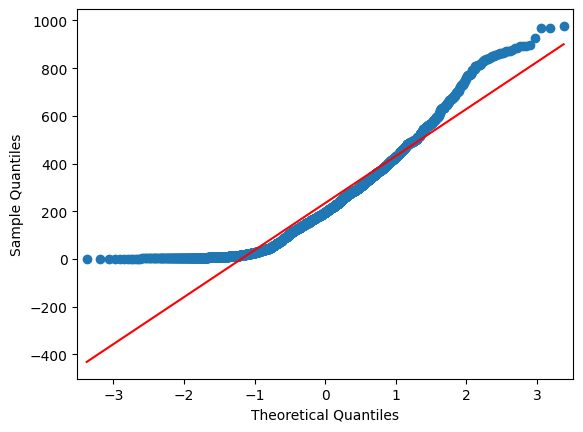

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics .gofplots import qqplot
qqplot(fall,line='s')
plt.show()

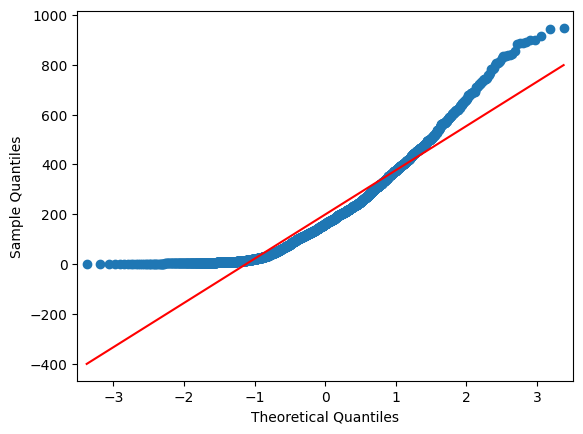

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics .gofplots import qqplot
qqplot(winter,line='s')
plt.show()

The QQplots show datas are not Gaussian.

<Axes: xlabel='season', ylabel='Count'>

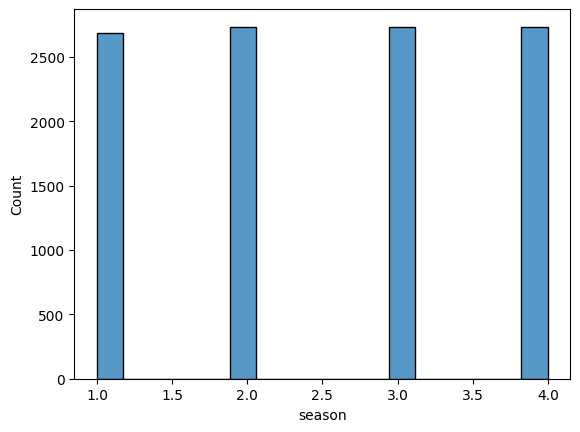

In [ ]:
sns.histplot(df['season'])

In [ ]:
#Levene test for variance
#H0:all input samples are from populations with equal variances.
#H1:all input samples have different variances.
levene(spring,summer,fall,winter)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [ ]:
df.season.unique()

array([1, 2, 3, 4])

In [ ]:
#H0:There is no significant difference on the demand of bicycles between any of the weather conditions.
#H1:There is a significant difference on the demand of bicycles between at least two of the weather conditions.
from scipy.stats import f_oneway
clear = df[df['weather'] == 1]['count']
mist = df[df['weather'] == 2]['count']
snow = df[df['weather'] == 3]['count']
rain = df[df['weather'] == 4]['count']
f_oneway(clear,mist,snow,rain)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

(Analysis of Variance) or ANOVA test on data related to different weather conditions (clear, mist, snow, rain) and their corresponding counts of bicycles on rent.
Statistic: The F-statistic value is approximately 65.53.
p-value: The p-value is very small,5.48*10^-42

A higher F-statistic indicates that there is a significant difference between the means of the groups.A very small p-value   indicates strong evidence against the null hypothesis.Since the p-value is significantly smaller than the chosen significance level, 0.05 we reject the null hypothesis. This suggests that there is a significant difference in counts between at least two of the weather conditions.

In [ ]:
#Shapiro-Wilk’s test
#H0:Data is Gaussian
#H1:Data is not Gaussian
from scipy.stats import shapiro
shapiro(clear)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8909230828285217, pvalue=0.0)

In [ ]:
from scipy.stats import shapiro
shapiro(mist)

ShapiroResult(statistic=0.8767687082290649, pvalue=9.781063280987223e-43)

In [ ]:
from scipy.stats import shapiro
shapiro(snow)

ShapiroResult(statistic=0.7674332857131958, pvalue=3.876090133422781e-33)

In [ ]:
#Data values must be at least of length three to perform Shapiro test here.
from scipy.stats import shapiro
shapiro(rain)

The test evaluates whether a given sample comes from a normally distributed population. Since the p-value is extremely small, we reject the null hypothesis. This suggests that there is strong evidence to conclude that the weather conditions are not normally distributed.

In all four cases data is found not to be  Gaussian.

<Axes: xlabel='count', ylabel='Count'>

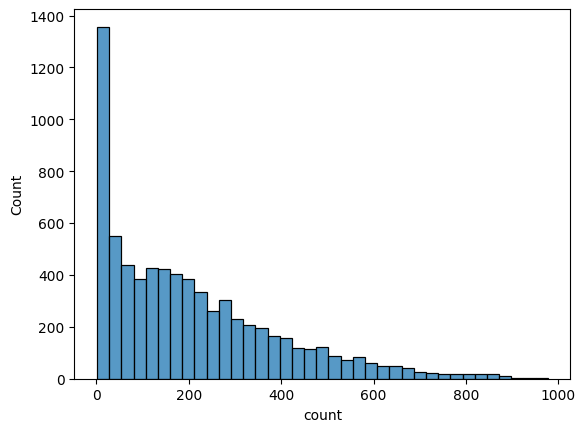

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(clear)

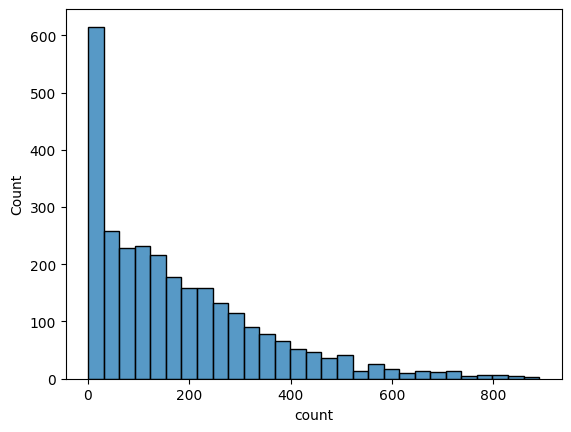

In [ ]:
sns.histplot(mist)

<Axes: xlabel='count', ylabel='Count'>

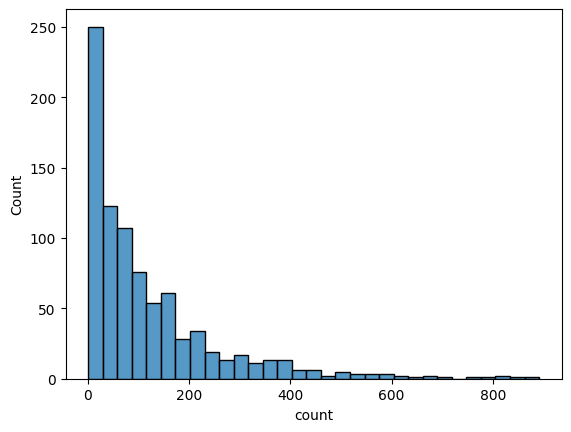

In [ ]:
sns.histplot(snow)

<Axes: xlabel='count', ylabel='Count'>

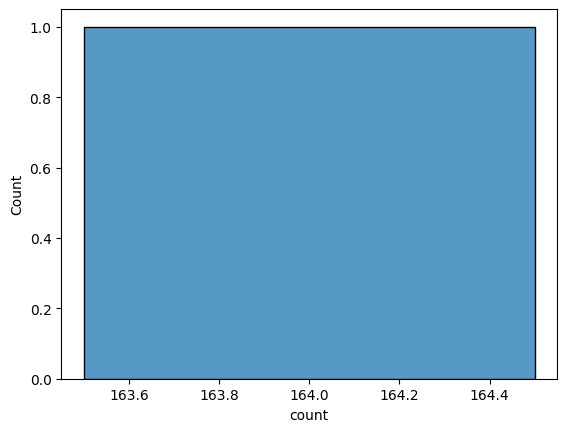

In [ ]:
sns.histplot(rain)

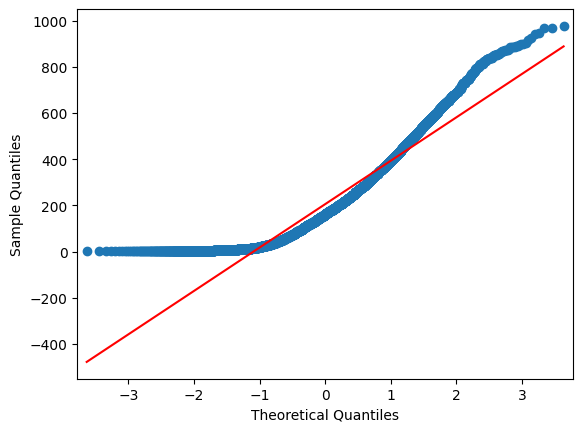

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics .gofplots import qqplot
qqplot(clear,line='s')
plt.show()

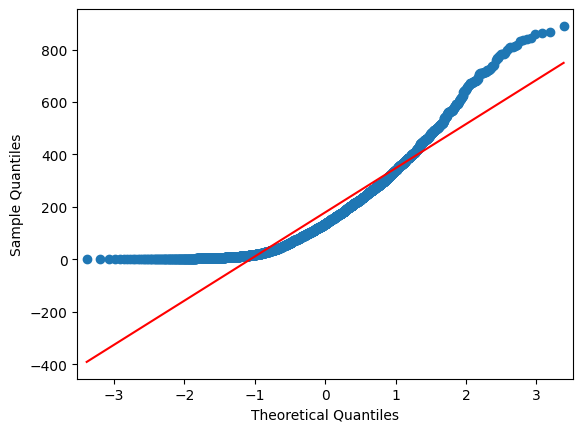

In [ ]:
qqplot(mist,line='s')
plt.show()

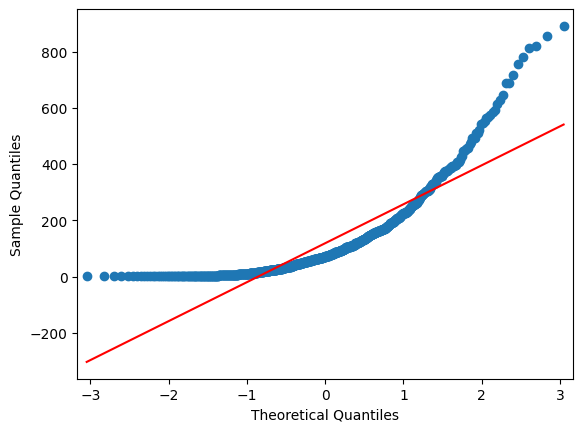

In [ ]:
qqplot(snow,line='s')
plt.show()

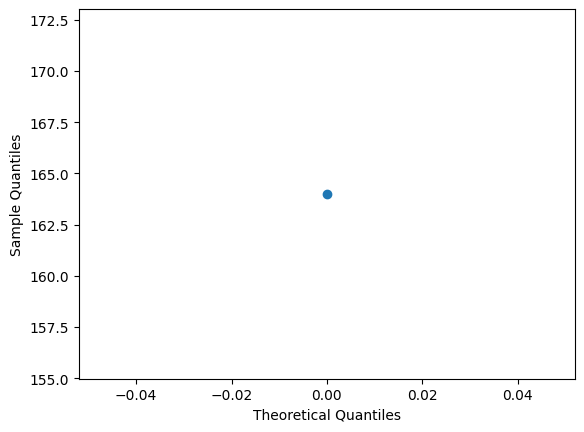

In [ ]:
qqplot(rain,line='s')
plt.show()

<Axes: xlabel='weather', ylabel='Count'>

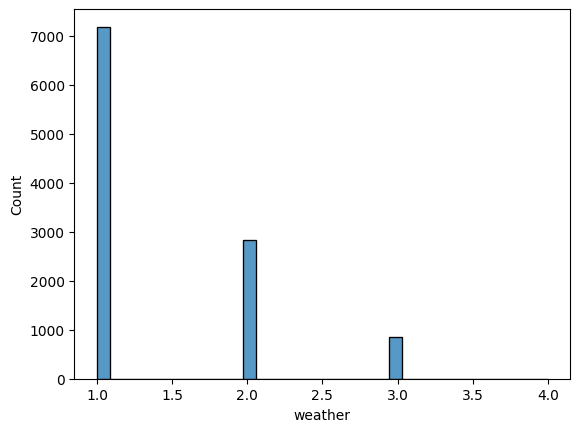

In [ ]:
sns.histplot(df['weather'])

In [ ]:
num_cols = df.dtypes != "object"
num_cols = list(num_cols[num_cols].index)
num_cols
df[num_cols].skew()
num_cols

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [ ]:
#Kurtosis factor
num_cols = df.dtypes != "object"
num_cols = list(num_cols[num_cols].index)
num_cols
df[num_cols].kurt()

season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
atemp         -0.850076
humidity      -0.759818
windspeed      0.630133
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64

Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Positive kurtosis indicates heavy tails, while negative kurtosis indicates light tails compared to a normal distribution.
Columns like "season", "workingday", "temp", "atemp", and "humidity" have negative kurtosis, indicating that their distributions are relatively flat compared to a normal distribution.
The "holiday" column has a very high positive kurtosis, indicating heavy tails.
Other columns such as "weather", "windspeed", "casual", "registered", and "count" have values closer to zero, suggesting distributions somewhat similar to a normal distribution, at least in terms of kurtosis.

In [ ]:
num_cols = df.dtypes != "object"
num_cols = list(num_cols[num_cols].index)
num_cols
df[num_cols].skew()

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

Skewness close to 0 indicates a relatively symmetrical distribution.
Positive skewness (skewness > 0) indicates a right-skewed distribution, meaning the tail of the distribution extends more towards the right.
Negative skewness (skewness < 0) indicates a left-skewed distribution, meaning the tail of the distribution extends more towards the left.
season: Skewness is close to 0, indicating a nearly symmetrical distribution.
holiday: Skewness is significantly positive (5.66), suggesting a right-skewed distribution, meaning there are likely very few holidays compared to non-holidays.
workingday: Skewness is slightly negative (-0.78), indicating a slight left-skewed distribution, suggesting there are slightly more non-working days than working days.
weather: Skewness is positive (1.24), indicating a right-skewed distribution, meaning there are likely more instances of lower weather severity.
temp, atemp, humidity, and windspeed: Skewness values are all close to 0, suggesting approximately symmetrical distributions for these variables.
casual, registered, and count: Skewness values are positive, indicating right-skewed distributions, meaning there are likely more lower counts of bike rentals, with a few instances of very high counts.

In [ ]:
#Levene test for variance
#H0:all input samples are from populations with equal variances.
#H1:all input samples have different variances.
levene(clear,mist,snow,rain)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

The Levene test statistic you obtained is 54.85, and the corresponding p-value is 3.505*10^-35.Since the p-value is significantly smaller than the significance level 0.05, we reject the null hypothesis.The variances of the weather conditions in this case are not equal across the groups (clear, mist, snow, and rain).They differ significantly across the groups.

In [ ]:
pd.crosstab(index = df['season'], columns = df['weather'], margins = True)

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


In [ ]:
pd.crosstab(index = df['season'], columns = df['weather'], margins = True,normalize=True)

weather,1,2,3,4,All
season,,,,,
1,0.161584,0.065681,0.019383,0.000092,0.246739
2,0.165442,0.065038,0.020577,0.000000,0.251056
3,0.177292,0.055484,0.018280,0.000000,0.251056
4,0.156348,0.074132,0.020669,0.000000,0.251148
All,0.660665,0.260334,0.078909,0.000092,1.000000


In [ ]:
pd.crosstab(index = df['season'], columns = df['weather'], normalize='index')

weather,1,2,3,4
season,,,,
1,0.654877,0.266195,0.078555,0.000372
2,0.658983,0.259056,0.081961,0.000000
3,0.706184,0.221003,0.072814,0.000000
4,0.622531,0.295172,0.082297,0.000000


In [ ]:
pd.crosstab(index = df['season'], columns = df['weather'], normalize='columns')

weather,1,2,3,4
season,,,,
1,0.244577,0.252294,0.245634,1.0
2,0.250417,0.249824,0.260768,0.0
3,0.268354,0.213126,0.231665,0.0
4,0.236652,0.284757,0.261932,0.0


In [ ]:
#Statistics of relation between seasons and climate.
#Observed frequencies
pd.crosstab(index = df['weather'], columns = df['season'], margins = True)



season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [ ]:
# Are weather and season related?
#For this problem statement, we need to perform the chi-squared test for independence.

'''
H0: Weather and season are not associated.
H1:Weather and season  are associated. '''

alpha=.05
observ=[[1759,1801,1930,1702],[715,708,604,807],[211,224,199,225],[1,0,0,0]]
observed = [[67,213,74], [411,633,129], [85,51,7], [27,60,15]]
a,b,c,d=chi2_contingency(observ)
test_statistic,p_value,dof,expec=a,b,c,d
print(d,'\n','The p_value is',b)
c


[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]] 
 The p_value is 1.5499250736864862e-07


9

The significance value,alpha is greater than the p-value. We reject H0 (Null Hypothesis),i.e. Weather and season are associated.
Therefore Yulu the pioneering micro-mobility service provider,rejects the null hypothesis and concludes events happening around different weathers and seasons are related.
There is difference between the observed frequencies and the expected frequencies if the two variables, weather and season were unrelated (p < .05). This suggests that the proportion of the effect of seasons is not the same for all weather.
Yulu can conclude that weather have an effect on seasonal happenings.